# PCA e LDA
Na aula de hoje iremos ver o funcionamento e aplicações dos algoritmos de **Extração de Features** PCA e LDA.
### Roteiro:
1. Conceito de Extração de Features.
2. Porquê ultilzar redutores de dimensionalidade.
3. PCA
  * Funcionamento do PCA
  * Utilizações
    * Aceleração do treinamento
    * Melhoramento de performance
    * Vizualização de dados
  * Vantagens e Desvantagens
4. LDA
  1. Funcionamento do LDA
  2. Quando ultilizar
  3. Vantagens e Desvantagens

# PCA - Principal Component Analysis

In [28]:
# Todos os imports necessários
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Funcionamento do PCA

<img style="height:700px;" src="files/images/pca_graph_2d.png">
<img style="height:700px;" src="files/images/pca_graph_3d.png">

### Passo a Passo

1. Pass
2. Pass
3. Pass
3. Pass

In [91]:
# data = np.array([[1, 2], [3, 4]])
data = datasets.load_iris()
data = data.data
data = StandardScaler().fit_transform(data)
print(data.T)
print(np.cov(data.T).shape)
eig_vals, eig_vecs = np.linalg.eig(np.cov(data.T))

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()


tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

x = data.dot(matrix_w)

# print(x[:3,:])

pca = PCA(n_components=2)
pca.fit(data)
data_t = pca.transform(data)
# print(pca.explained_variance_ratio_)
# print(data_t[:3,:])

[[-9.00681170e-01 -1.14301691e+00 -1.38535265e+00 -1.50652052e+00
  -1.02184904e+00 -5.37177559e-01 -1.50652052e+00 -1.02184904e+00
  -1.74885626e+00 -1.14301691e+00 -5.37177559e-01 -1.26418478e+00
  -1.26418478e+00 -1.87002413e+00 -5.25060772e-02 -1.73673948e-01
  -5.37177559e-01 -9.00681170e-01 -1.73673948e-01 -9.00681170e-01
  -5.37177559e-01 -9.00681170e-01 -1.50652052e+00 -9.00681170e-01
  -1.26418478e+00 -1.02184904e+00 -1.02184904e+00 -7.79513300e-01
  -7.79513300e-01 -1.38535265e+00 -1.26418478e+00 -5.37177559e-01
  -7.79513300e-01 -4.16009689e-01 -1.14301691e+00 -1.02184904e+00
  -4.16009689e-01 -1.14301691e+00 -1.74885626e+00 -9.00681170e-01
  -1.02184904e+00 -1.62768839e+00 -1.74885626e+00 -1.02184904e+00
  -9.00681170e-01 -1.26418478e+00 -9.00681170e-01 -1.50652052e+00
  -6.58345429e-01 -1.02184904e+00  1.40150837e+00  6.74501145e-01
   1.28034050e+00 -4.16009689e-01  7.95669016e-01 -1.73673948e-01
   5.53333275e-01 -1.14301691e+00  9.16836886e-01 -7.79513300e-01
  -1.02184

## Data Vizualization

Abaixo veremos a diferença entre tentar vizualizar os dados sem e com o PCA nos planos 2D e 3D

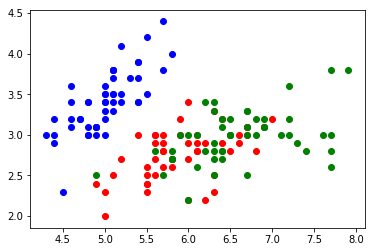

In [27]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

colors = ['blue', 'red', 'green']

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]], )

[0.92461621 0.05301557 0.01718514 0.00518309]


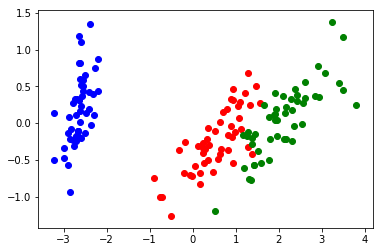

In [26]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
X = pca.transform(X)

colors = ['blue', 'red', 'green']

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]])
plt.show()

## Aumento da Acurácia

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

data = load_breast_cancer()
X = data.data
Y = data.target
print("Data shape before PCA: ", X.shape)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier()
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy before PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy before PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

pca = PCA(.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
# print(pca.explained_variance_)
X = pca.transform(X)
print("Data shape after PCA: ", X.shape)

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier()
# knn.fit(x_train, y_train)
scores_knn = cross_val_score(knn, X, Y, cv=10)
scores_mlp = cross_val_score(mlp, X, Y, cv=10)
print("Accuracy after PCA(KNN): %0.4f (+/- %0.4f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy after PCA(MLP): %0.4f (+/- %0.4f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

# LDA - Linear Discriminant Analysis

## Funcionamento do LDA

<img style="height:400px;" src="files/images/lda_graph.png">
<!-- <img style="height:700px;" src="files/images/pca_graph_3d.png"> -->

### Passo a Passo

1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW (where every column represents an eigenvector).
5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, and yy are the transformed n×k-dimensional samples in the new subspace).

[0.99147248 0.00852752] [0 1 2]
(150, 2)


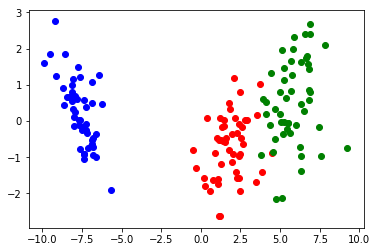

In [34]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
print(lda.explained_variance_ratio_, lda.classes_)
X = lda.transform(X)
print(X.shape)
colors = ['blue', 'red', 'green']

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], c=colors[Y[i]])
plt.show()